In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
labels=[]
messages=[]
with open("SMSSpamCollection","r") as f:
    for line in f:
        parts=line.strip().split("\t")
        if len(parts)==2:
            label, message = parts
            labels.append(label)
            messages.append(message)

df=pd.DataFrame({"Label": labels,"Message": messages})
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     4827
spam     747
Name: Label, dtype: int64


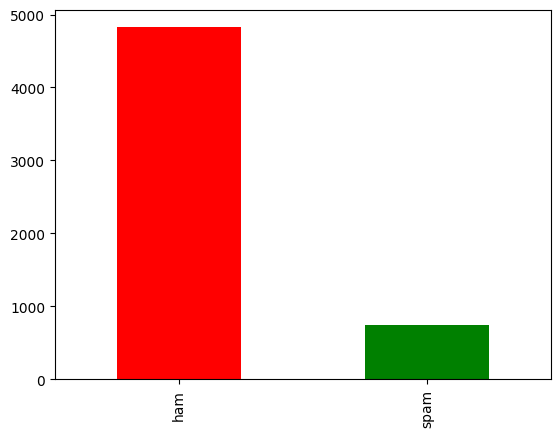

In [3]:
c=pd.value_counts(df["Label"],sort=True)
print(c)
c.plot(kind='bar',color=["red","green"])

plt.show()

**PreProcessing**

In [4]:
df.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    642  Please call our customer service representativ...    4

In [5]:
df["spam"]=df['Label'].apply(lambda x:1 if x=='spam' else 0)

In [6]:
# Removing Punctuations
pattern = r'[^\w\s]'
df_pre=df
df_pre['Message']=df_pre['Message'].str.replace(pattern,"")
df_pre.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_27504\3428556668.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pre['Message']=df_pre['Message'].str.replace(pattern,"")


,Label,Message,spam
0,ham,Go until jurong point crazy Available only in ...,0
1,ham,Ok lar Joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor U c already then say,0
4,ham,Nah I dont think he goes to usf he lives aroun...,0


In [7]:
cv=CountVectorizer(stop_words='english')
X_pre=cv.fit_transform(df_pre['Message'])
X_train_pre, X_test_pre, y_train_pre, y_test_pre =train_test_split(X_pre,df_pre.spam,test_size=0.3)


In [8]:
model_pre=MultinomialNB()
model_pre.fit(X_train_pre,y_train_pre)

MultinomialNB()

In [9]:
conf_pre=confusion_matrix(y_test_pre,model_pre.predict(X_test_pre))
conf_pre=pd.DataFrame(data=conf_pre,columns=['Predicted False','Prediceted True'],index=['Actual False','Actual True'])
conf_pre

,Predicted False,Prediceted True
Actual False,1394,26
Actual True,22,231


In [10]:
y_pred_pre=model_pre.predict(X_test_pre)
accuracy_score(y_test_pre, y_pred_pre)

0.9713090257023311

Not Pre Processed Message

In [11]:
cv_notPre=CountVectorizer()
X=cv_notPre.fit_transform(df.Message)
X_train, X_test, y_train, y_test =train_test_split(X,df.spam,test_size=0.3)
model=MultinomialNB()
model.fit(X_train,y_train)
conf=confusion_matrix(y_test,model.predict(X_test))
conf=pd.DataFrame(data=conf,columns=['Predicted False','Prediceted True'],index=['Actual False','Actual True'])
conf

,Predicted False,Prediceted True
Actual False,1441,23
Actual True,14,195


In [12]:
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9778840406455469

In [13]:
df['Message']

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: Message, Length: 5574, dtype: object